In [1]:
# 2/9/2019 | 2/14/2019 | 
# Final Challenge - Data Exploration 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

%matplotlib inline 

### Customer Data Set

In [2]:
#import datasets
cust = pd.read_csv("C:/Users/josh/Desktop/python_datasets/AdvWorksCusts.csv")


In [3]:
# Data Cleaning 
# Column names 
# Column names are labeled appropriately
print(cust.columns)

# Shapes of dataset 
print(cust.shape)

# Count the total number or rows 
print(len(cust))

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')
(16519, 23)
16519


In [4]:
# explore the datasets first 5 observation/records/trials 
cust.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [5]:
# Count the number or null values in each column
cust.isnull().sum()
# isnull() or isna() - works either way 
#cust.isna().sum()

CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
dtype: int64

In [6]:
# Precentage of missing values in each column 
(cust.isna().sum()/len(cust))*100

CustomerID               0.000000
Title                   99.467280
FirstName                0.000000
MiddleName              42.284642
LastName                 0.000000
Suffix                  99.987893
AddressLine1             0.000000
AddressLine2            98.329197
City                     0.000000
StateProvinceName        0.000000
CountryRegionName        0.000000
PostalCode               0.000000
PhoneNumber              0.000000
BirthDate                0.000000
Education                0.000000
Occupation               0.000000
Gender                   0.000000
MaritalStatus            0.000000
HomeOwnerFlag            0.000000
NumberCarsOwned          0.000000
NumberChildrenAtHome     0.000000
TotalChildren            0.000000
YearlyIncome             0.000000
dtype: float64

In [7]:
# Check for duplicate rows
# CustomerID is our unique identifier row 
print(len(cust["CustomerID"]))
print(cust['CustomerID'].nunique())

# Additional way to check for duplicates 
print(cust.shape)
print(cust.CustomerID.unique().shape)

16519
16404
(16519, 23)
(16404,)


In [8]:
#determine the data type for each column 
cust.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

In [9]:
# remove duplicates 
cust.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)

# check that duplicates have been removed
print(len(cust["CustomerID"]))
print(cust['CustomerID'].nunique())

16404
16404


In [10]:
# Summary Statistics 
cust.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78128.531517
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39726.533060
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47811.750000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105200.250000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [11]:
# correlation matrix 
corr = cust.corr()
print(corr)

                      CustomerID  HomeOwnerFlag  NumberCarsOwned  \
CustomerID              1.000000      -0.123425         0.004475   
HomeOwnerFlag          -0.123425       1.000000        -0.054155   
NumberCarsOwned         0.004475      -0.054155         1.000000   
NumberChildrenAtHome   -0.018401       0.133771         0.424284   
TotalChildren          -0.017605       0.185715         0.394726   
YearlyIncome           -0.058848       0.074911         0.345131   

                      NumberChildrenAtHome  TotalChildren  YearlyIncome  
CustomerID                       -0.018401      -0.017605     -0.058848  
HomeOwnerFlag                     0.133771       0.185715      0.074911  
NumberCarsOwned                   0.424284       0.394726      0.345131  
NumberChildrenAtHome              1.000000       0.647472      0.365388  
TotalChildren                     0.647472       1.000000      0.362393  
YearlyIncome                      0.365388       0.362393      1.000000  


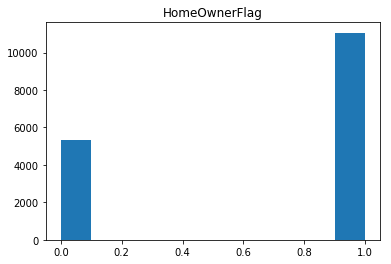

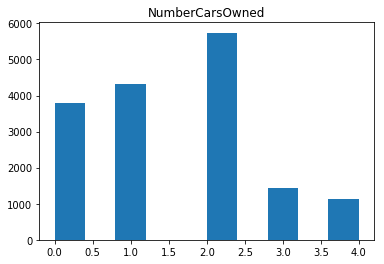

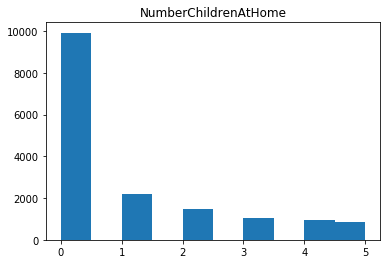

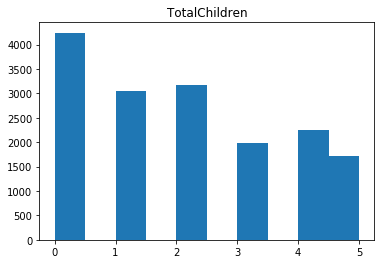

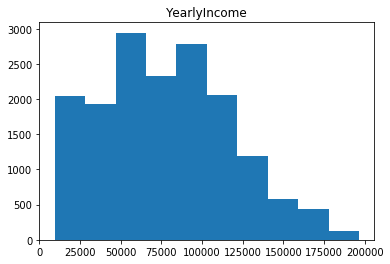

In [12]:
# Visualizations 
# loop to print lots of histograms 
cols = ['HomeOwnerFlag', 'NumberCarsOwned',
        'NumberChildrenAtHome', 'TotalChildren',
        'YearlyIncome']

for i in cols:
    plt.hist(cust[i], bins = 10)
    plt.title(i)
    plt.show()

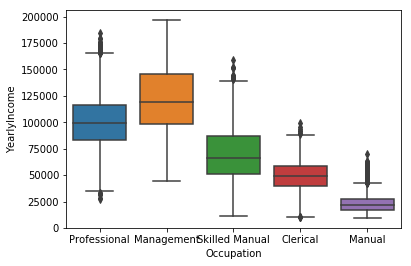

In [13]:
# Question 7 
# Rank the median YearlyIncome by Occupatoin 
sns.boxplot(x = cust['Occupation'], y = cust['YearlyIncome'] )




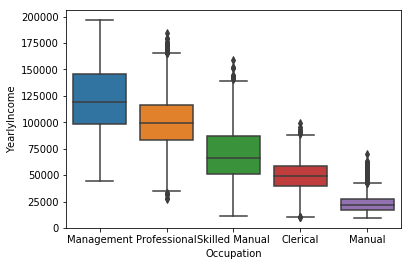

In [97]:
# Ordered boxplot based on the order argument 

sns.boxplot(x = cust['Occupation'], y = cust['YearlyIncome'], order = ['Management', 'Professional', 'Skilled Manual', 
                                                                      'Clerical', 'Manual'])

In [96]:
# find unique categorical values 

cust['Occupation'].unique()

array(['Professional', 'Management', 'Skilled Manual', 'Clerical',
       'Manual'], dtype=object)

In [98]:
# counting unique categorical values 

cust['Occupation'].value_counts()

Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

In [76]:
# Using groupby to get the same above visualizations 

cust[['Occupation', 'YearlyIncome']].groupby('Occupation').median()

,YearlyIncome
Occupation,
Clerical,49481.0
Management,118781.0
Manual,21722.0
Professional,99051.5
Skilled Manual,66471.5


In [82]:
# Using groupby and sort_values to get an appropriate ordering for the sorted and aggregagted values 

cust[['Occupation', 'YearlyIncome']].groupby('Occupation').median().sort_values('YearlyIncome', ascending = False)

,YearlyIncome
Occupation,
Management,118781.0
Professional,99051.5
Skilled Manual,66471.5
Clerical,49481.0
Manual,21722.0


In [99]:
custviz = cust[['Occupation', 'YearlyIncome']].groupby('Occupation').median().sort_values('YearlyIncome', ascending = False)

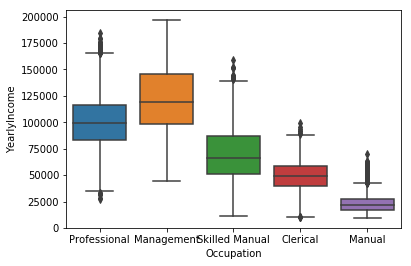

In [14]:
# Question 7 
# Rank the median YearlyIncome by Occupatoin 
sns.boxplot(x = cust['Occupation'], y = cust['YearlyIncome'] )


### Monthly Spend Dataset

In [15]:
# import dataset 
import pandas as pd 
spend = pd.read_csv("C:/Users/josh/Desktop/python_datasets/AW_AveMonthSpend.csv")

In [16]:
spend.columns

Index(['CustomerID', 'AveMonthSpend'], dtype='object')

In [17]:
# Data Prep - remove duplicates
print(len(spend))
# looking for duplicate Id with .nunique()
print(spend.CustomerID.nunique())

# remove duplicates 
spend.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)

# Check that duplicates were removed 
print(len(spend))
print(spend.CustomerID.nunique())


16519
16404
16404
16404


In [18]:
# show summary statistics 
spend.describe()

# Answers for questions 1-5 

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.389905
std,5340.370705,27.269568
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


### Bike Buyer

In [19]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
# import dataset 
bike = pd.read_csv("C:/Users/josh/Desktop/python_datasets/AW_BikeBuyer.csv")

In [21]:
bike.columns

Index(['CustomerID', 'BikeBuyer'], dtype='object')

In [22]:
# Data Prep - remove duplicates
print(len(bike))
print(bike.CustomerID.nunique())

# remove duplicates 
bike.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)

# Check that duplicates were removed 
print(len(bike))
print(bike.CustomerID.nunique())


16519
16404
16404
16404


In [23]:
# Summary statistics 
bike.describe()

,CustomerID,BikeBuyer
count,16404.000000,16404.000000
mean,20240.143136,0.332297
std,5340.370705,0.471051
min,11000.000000,0.000000
25%,15617.750000,0.000000
50%,20231.500000,0.000000
75%,24862.250000,1.000000
max,29482.000000,1.000000


In [24]:
bike.head(5)

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


(array([10953.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5451.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

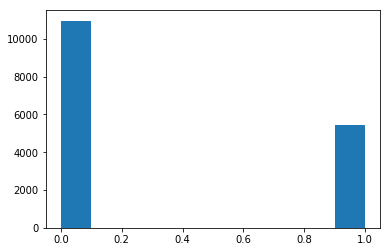

In [25]:
# Histogram of bikebuyer column 
plt.hist(bike.BikeBuyer)

# Question 6

### Question 8 

In [26]:
# Question 8

# merge customer and spend 
custspend = pd.merge(cust, 
                    spend, 
                    right_on = 'CustomerID',
                    left_on = 'CustomerID')


# create age column
# create age column subsets 

# create reference date object 
import datetime
# add date column 
custspend['date_collection_1998'] = datetime.date(1998, 1,1)

In [27]:
# convert date columns to datetime columns 
custspend.BirthDate = pd.to_datetime(custspend.BirthDate)
custspend.date_collection_1998 = pd.to_datetime(custspend.date_collection_1998)

# create a age in days column 
custspend['age_in_days'] = custspend.date_collection_1998 - custspend.BirthDate

In [28]:
# use dateutil package to compute age in years 
import dateutil
from dateutil.relativedelta import relativedelta
# create column a column for age in years 
custspend['age_in_years'] = [relativedelta(i, j).years for i, j in zip(custspend['date_collection_1998'],
                                           custspend['BirthDate'])]

### Need to Fix This 

In [29]:
# sample code from dr. weaver 
#---------------------------------------------------------
# .loc - label based indexing 
# boolean logic indexer 
# select column to transform 
# df.loc[boolean_indexer, column_to_transform] = value_in_transformed_column 
# 


# df.loc[df.col1 == 3, 'col2'] = 'three'
# df.col1 - creates boolean logic that indexes the rows 
# 'col2' - selects the column based on column name
# = 'three' - set the col2 value to the string 'three'
#             when the bolean logic holds true
# https://stackoverflow.com/questions/12307099/modifying-a-subset-of-rows-in-a-pandas-dataframe
# boolean indexer for selection 
# set values based on the indexer True / False 

#---------------------------------------------------------
# .loc - label based indexing, boolean based indexing 
# .iloc - for integer based indexing 
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

# filtering using .loc method 
# filtering is possible to use the .filter method 

#----------------------------------------------------------
# This is used for discretization - creating new discrete features from a continuous variable 
# often used in reporting


In [113]:
custspend.loc[(custspend.age_in_years < 25), 'age_by_category'] = 'under 25'
custspend.loc[(custspend.age_in_years >= 25) & (custspend.age_in_years < 45), 'age_by_category'] = 'age 25 to 45'
custspend.loc[(custspend.age_in_years >= 45) & (custspend.age_in_years < 55), 'age_by_category'] = 'age 45 to 55'
custspend.loc[(custspend.age_in_years >= 55), 'age_by_category'] = 'over 55'

In [119]:
custspend['age_by_category'].value_counts()

age 25 to 45    9981
under 25        2932
age 45 to 55    2437
over 55         1054
Name: age_by_category, dtype: int64

In [33]:
custspend.age_category.value_counts()

age_25_45    10272
under_25      2932
age_46_54     2146
over_55       1054
Name: age_category, dtype: int64

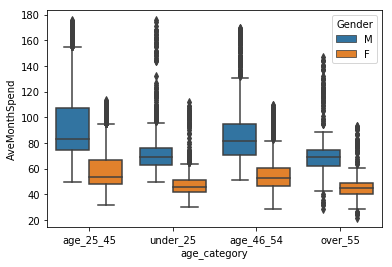

In [34]:
# Question 8

sns.boxplot(x = custspend.age_category, y=custspend.AveMonthSpend, hue = custspend.Gender)

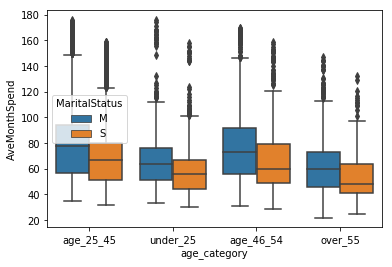

In [35]:
# Question 9 

sns.boxplot(x = custspend.age_category, y=custspend.AveMonthSpend, hue = custspend.MaritalStatus)

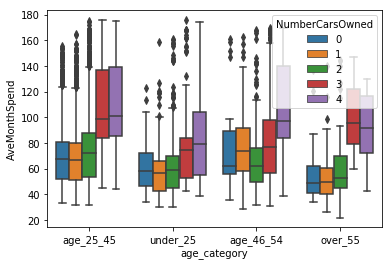

In [36]:
#Question 9 
sns.boxplot(x = custspend.age_category, y=custspend.AveMonthSpend, hue = custspend.NumberCarsOwned)

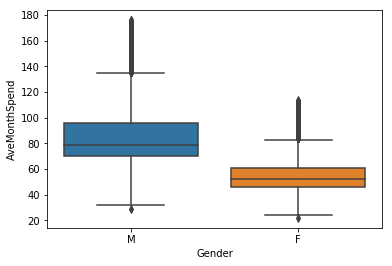

In [37]:
#Question 9 
sns.boxplot(x = custspend.Gender, y=custspend.AveMonthSpend)

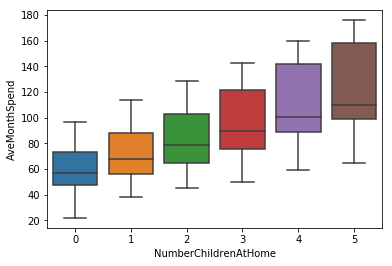

In [38]:
#Question 9 
sns.boxplot(x = custspend.NumberChildrenAtHome, y=custspend.AveMonthSpend)

### Question 10 

In [39]:
# merge custspend and bike datasets 

# Checking that datasets are equal length
print(len(bike))
print(len(custspend))


# merge 
alldata = pd.merge(custspend, 
                   bike, 
                   right_on = 'CustomerID',
                   left_on = 'CustomerID')

16404
16404


In [40]:
# value counts for bike buyers 
alldata.BikeBuyer.value_counts()

0    10953
1     5451
Name: BikeBuyer, dtype: int64

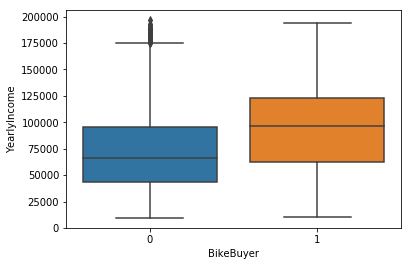

In [41]:
# Question 10 
sns.boxplot(x = alldata.BikeBuyer, y=alldata.YearlyIncome)

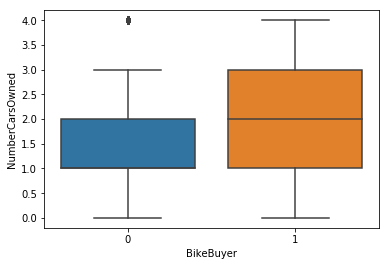

In [42]:
# Question 10 
sns.boxplot(x = alldata.BikeBuyer, y=alldata.NumberCarsOwned)

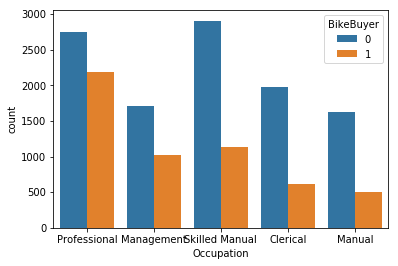

In [43]:
# Question 10 
sns.countplot(x = alldata.Occupation, hue = alldata.BikeBuyer)

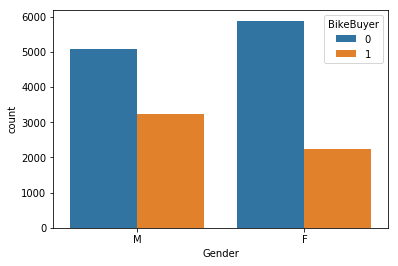

In [44]:
# Question 10 
sns.countplot(x = alldata.Gender, hue = alldata.BikeBuyer)

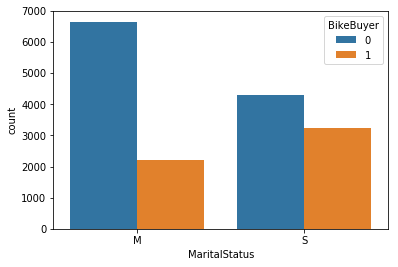

In [45]:
# Question 10 
sns.countplot(x = alldata.MaritalStatus, hue = alldata.BikeBuyer)

### Classification Challenge 

In [46]:
# Data preparation 
alldata.isnull().sum()

CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16130
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
date_collection_1998        0
age_in_days                 0
age_in_years                0
age_by_category             0
age_category                0
BikeBuyer                   0
dtype: int64

In [47]:
# drop data frames with missing data
alldata = alldata.drop(columns = ['Title', 'MiddleName', 'Suffix', 'AddressLine2'])

In [48]:
# drop columns base on name create previously
# the added columns were all based on birthdate
# keeping the columns would result in multicollinearity 
# leave age in days for prediction 

alldata = alldata.drop(columns = ['date_collection_1998',
                                  'age_in_years', 'age_category'])



In [49]:
# correlation matrix looking for correlations 
# correlation matrix 
corr = alldata.corr()
print(corr)

                      CustomerID  HomeOwnerFlag  NumberCarsOwned  \
CustomerID              1.000000      -0.123425         0.004475   
HomeOwnerFlag          -0.123425       1.000000        -0.054155   
NumberCarsOwned         0.004475      -0.054155         1.000000   
NumberChildrenAtHome   -0.018401       0.133771         0.424284   
TotalChildren          -0.017605       0.185715         0.394726   
YearlyIncome           -0.058848       0.074911         0.345131   
AveMonthSpend          -0.025823       0.133408         0.347716   
BikeBuyer              -0.007976       0.000127         0.164835   

                      NumberChildrenAtHome  TotalChildren  YearlyIncome  \
CustomerID                       -0.018401      -0.017605     -0.058848   
HomeOwnerFlag                     0.133771       0.185715      0.074911   
NumberCarsOwned                   0.424284       0.394726      0.345131   
NumberChildrenAtHome              1.000000       0.647472      0.365388   
TotalChildre

### follow the classification lab 

In [50]:
# dummy encoding for age_category, education, occupation, gender, maritalstatus

In [121]:
# note: an attribute of an object -  vs -  calling function off and object 
# calling a funtion requries .() 
# as seen here calling an attribute doesn't require the closing parentheses

alldata.dtypes

CustomerID               int64
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
age_by_category         object
dtype: object

### Follow Applications of Classification Lab Template 

In [52]:
# classification model for two classes
# Supervised learning because we have the labels to train our model 
# agenda 
# 1. prepare data from classification models using scikit-learn 
# 2. Constructing a classification model using scikit-learn 
# 3. Evaluating the performance of the classificaiton model 
# 4. Use techinques such as rewighting the labels and changing the decison 
#    threshold to change the trade-off between false positive and false negative
#    error rates. 

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import math 
from sklearn import preprocessing 
import sklearn.model_selection as ms 
from sklearn import linear_model 
import sklearn.metrics as sklm

In [54]:
alldata.dtypes

CustomerID                        int64
FirstName                        object
LastName                         object
AddressLine1                     object
City                             object
StateProvinceName                object
CountryRegionName                object
PostalCode                       object
PhoneNumber                      object
BirthDate                datetime64[ns]
Education                        object
Occupation                       object
Gender                           object
MaritalStatus                    object
HomeOwnerFlag                     int64
NumberCarsOwned                   int64
NumberChildrenAtHome              int64
TotalChildren                     int64
YearlyIncome                      int64
AveMonthSpend                     int64
age_in_days             timedelta64[ns]
age_by_category                  object
BikeBuyer                         int64
dtype: object

In [55]:
# drop AveMonthSpend - as its not in the test dataset 
alldata = alldata.drop(columns = ['AveMonthSpend'])

In [56]:
# Determine if their is label class imbalance 
# class imbalance - unequal number of cases for the categories of the label 
alldata.BikeBuyer.value_counts()

0    10953
1     5451
Name: BikeBuyer, dtype: int64

In [57]:
# only ~ 30% of dataset shows buyers of bikes 

In [58]:
# prepare data for scikit-learn 
# create numpy arrays that are required for scikit-learn 

# create numpy array for the label values 
labels = np.array(alldata['BikeBuyer'])

In [59]:
# categorical variables need to be recoded as binary dummy variables 
# 3-step process
# 1. encode the categorical string variables as integers 
# 2. transform the integer codd variables to dummy variables 
# 3. Append each dummy coded categorical variable to the model matrix 

In [60]:
# place holder - quite a bit of encoding needs to take place here 

In [61]:
alldata.dtypes

CustomerID                        int64
FirstName                        object
LastName                         object
AddressLine1                     object
City                             object
StateProvinceName                object
CountryRegionName                object
PostalCode                       object
PhoneNumber                      object
BirthDate                datetime64[ns]
Education                        object
Occupation                       object
Gender                           object
MaritalStatus                    object
HomeOwnerFlag                     int64
NumberCarsOwned                   int64
NumberChildrenAtHome              int64
TotalChildren                     int64
YearlyIncome                      int64
age_in_days             timedelta64[ns]
age_by_category                  object
BikeBuyer                         int64
dtype: object

In [62]:
# for learning purposes - dropped all non-numeric fields and datetime fields 
# need help with dummy variables 

# drop columns 
# different syntax here .drop drops columns with assignment needed 
alldata.drop(alldata.columns[1:14], axis =1, inplace = True)
alldata = alldata.drop(columns = ['age_in_days'])


In [63]:
alldata.dtypes

CustomerID               int64
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
age_by_category         object
BikeBuyer                int64
dtype: object

In [64]:
# not sure what the tutorial is aiming for here 
# Randomly sample observations to create independent training and test data
# indx = range(alldata.shape[0])
# indx = ms.train_test_split(indx, )

In [65]:
##########################
# tutorial - medium 
# create lables 
y = alldata.BikeBuyer

In [66]:
# # drop bikebuyer label from dataset 
alldata = alldata.drop(columns = ['BikeBuyer'])

In [67]:
# create training and testing 
X_train, X_test, y_train, y_test = ms.train_test_split(alldata,y, test_size = 0.3)

### Construct logistic regression model 

In [68]:
# create logistic regression model (specify hyperparameters for tuning)
# fit the model 
# make predictions based on the model 

lr = linear_model.LogisticRegression()
lrmodel = lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

C:\Users\josh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 

In [ ]:
predictions[0:5]

In [ ]:
# Accuracy Score 
lrmodel.score(X_test, y_test)

In [ ]:
# confusion matrix 
# TP | FP
# --------
# FN | TN


from sklearn.metrics import confusion_matrix as confustion_matrix 

confustion_matrix(y_test, predictions)


In [ ]:
# print and examine model coefficients 
print(lr.intercept_)
print(lr.coef_)

In [ ]:
# display probabilities for each class
# first column is the probability of 0 
# secone column is the probability of 1 
lr.predict_proba(X_test)

In [1]:
# Score and evaluate the classification model 
# confusion matrix 
import os 
os.getcwd()

'C:\\Users\\josh'